In [ ]:
!pip install gdal
!pip install rasterio

In [ ]:
!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 4.6 MB/s 


In [ ]:
import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow
import numpy as np


In [ ]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

In [ ]:
print (img)

In [ ]:
img.shape
#representação linha coluna bandas

(1233, 1520, 6)

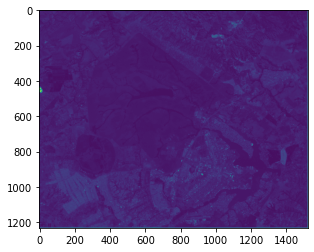

In [ ]:
plt.imshow(img[:,:,0])
#plotar todas as linhas ( : ) e colunas, e a banda 1 - 0 pq python começa a contar do 0

ValueError: ignored

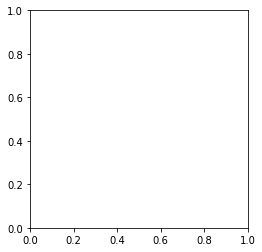

In [ ]:
plt.imshow(img[:,:,0],cmap='grey') 
#errei a banda de cores, o metodo lista as que existem

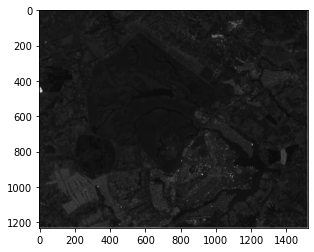

In [ ]:
plt.imshow(img[:,:,0],cmap="Greys_r")

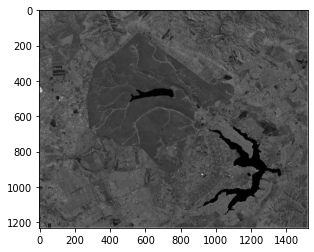

In [ ]:
plt.imshow(img[:,:,3],cmap="Greys_r")
#plotar a banda 4

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [13.0, 255.0]
    B: [40.0, 255.0]

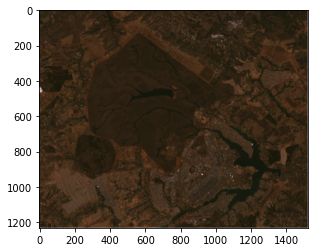

In [ ]:
imshow(img,bands=(2,1,0))
#imshow do spctral fazendo composição de bandas 3,2,1
#apesar de simples e fácil, ele perde algumas informações no método de visualização como as coordenadas

In [ ]:
from osgeo import gdal
#vizualizar na biblioteca gdal

In [ ]:
img2 =gdal.Open('/content/L71221071_07120010720_DN.tif')

In [ ]:
print (img2)
#n esta na estrutura do numpy que facilita o trabalho 

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f9f9a03fd80> >


In [ ]:
imshow(img2)

AttributeError: ignored

ImageView object:
  Display bands       :  [0, 760.0, 1519]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [10.0, 255.0]
    B: [255.0, 255.0]

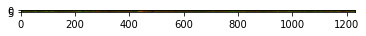

In [ ]:
img3 = img2.ReadAsArray()
imshow(img3)
#agora leu ma esta alguma coisa errada,

In [ ]:
img3.shape
# esta com argumentos trocadas, antes lia linha/coluna/banda - desta forma esta banda/linha/coluna

(6, 1233, 1520)

In [ ]:
img3 =img3.swapaxes(0,2)
#troca de lugar banda com coluna
img3 =img3.swapaxes(0,1)
#troca de lugar banda com coluna com linha
img3.shape
#agora a representação esta ok linha coluna banda

(1233, 1520, 6)

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

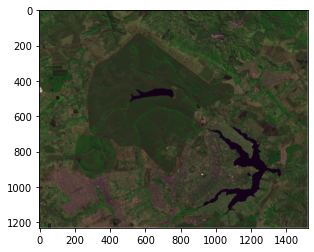

In [ ]:
imshow(img3,bands=(2,3,1))

In [ ]:
b1 = img2.GetRasterBand(1).ReadAsArray()
#outro metodo para ler bandas como array e usar numpy - atenção que o gdal
# foge da logica python e começa a contar bandas do 1

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [40.0, 255.0]
    B: [40.0, 255.0]

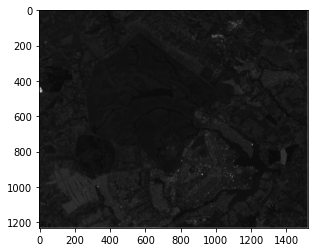

In [ ]:
imshow(b1)

In [ ]:
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()
#bandas separadas mas estao lidas ok

In [ ]:
stack = np.dstack([b1,b2,b4])
#stackando as bandas (só as 3 que selecionei)
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

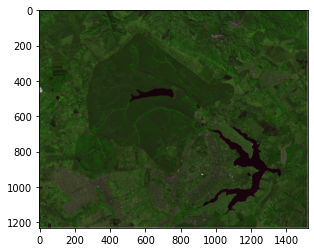

In [ ]:
imshow(stack,bands=(1,2,0))
#deu certo mas tb esta sem coordenadas

In [ ]:
import rasterio
from rasterio.plot import show

In [ ]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

In [ ]:
print(rst)
#n veio como array bonitinho da numpy

<open DatasetReader name='/content/L71221071_07120010720_DN.tif' mode='r'>


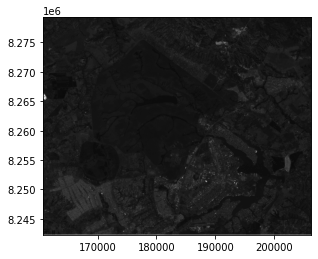

In [ ]:
show(rst,cmap='Greys_r')
#veio com as coordenadas UTM

In [ ]:
b1  =rst.read(1)
b2  =rst.read(2)
b4  =rst.read(4)

In [ ]:
stack2 = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

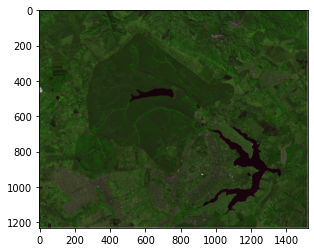

In [ ]:
imshow(stack2,bands=(1,2,0))

In [ ]:
with rasterio.open('/content/L71221071_07120010720_DN.tif') as rst:
  b1  =rst.read(1)
  b2  =rst.read(2)
  b4  =rst.read(4)
stack3 = np.dstack([b1,b2,b4])
#outro metodo usando with que roda o processo rasterio.open depois fecha para n deixar rastro na memoria

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

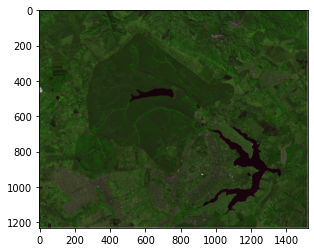

In [ ]:
imshow(stack3,bands=(1,2,0))